<a href="https://colab.research.google.com/github/spittaya/ShopifyDSWinterChallenge/blob/main/Winter2019DataScienceChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read in csv data file 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Shopify 2022 Challenge/2019_Winter_Data_Science_Intern_Challenge_Data_Set_Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
#check data read
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Initial Analysis
- 3145.13 amount is the mean of all order amounts 
- maximum order amount = $704,000 which may be skewing the mean of order amounts with 2000 items in that one order
- outliers in order amounts may be skewing AOV calculation

### Assumptions
- order_amount is in $CAD 
- price per piece = order amount / total items (since there is only one unique item per shop)

### Next Steps
- take a look at quantile plot for order_amount
- take a look at snearker price by shop ID, maybe some shops have a much higher price per piece than others

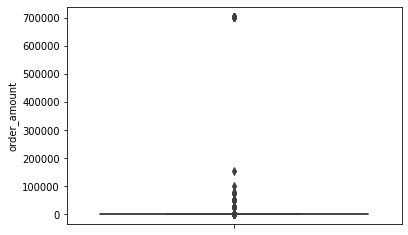

In [ ]:
order_amount = sns.boxplot(y="order_amount", data=df)

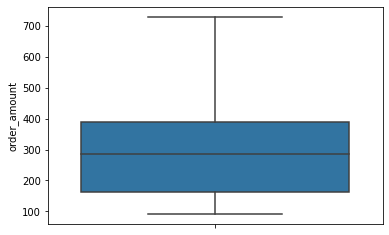

In [ ]:
#boxplot for order amounts without outliers
order_amount_outliers = sns.boxplot(y="order_amount", data=df, showfliers = False)

In [ ]:
#price per piece by shop ID
ppp_df = df
ppp_df['price_per_piece'] = ppp_df.order_amount / ppp_df.total_items
ppp_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_piece
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


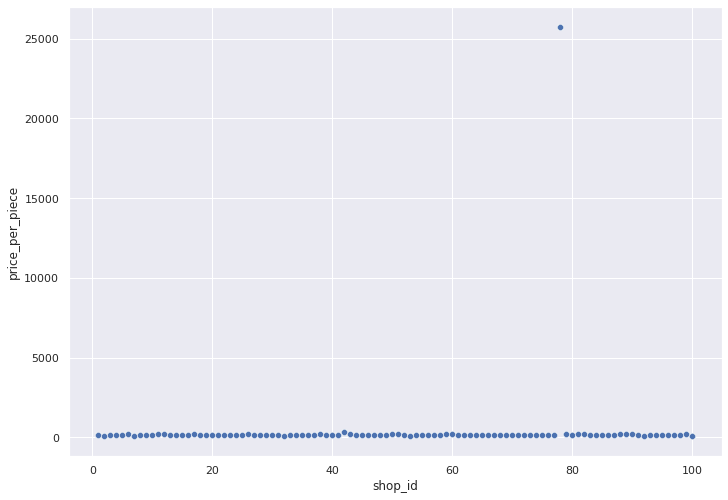

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=ppp_df, x='shop_id', y='price_per_piece')

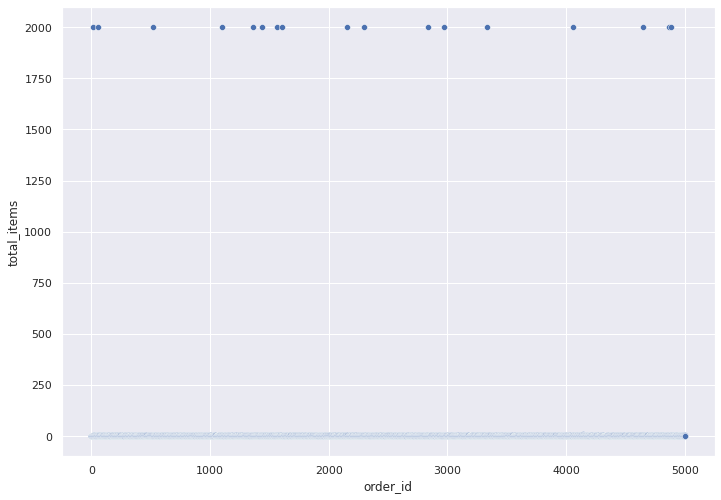

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=ppp_df, x='order_id', y='total_items')

### Analysis of Plots
- we can see that there is shop (shop_ID = 78) with a price per piece value at >25000CAD
  - this may be a price error with the store or it may be a price is an incorrect currency that worth less than $CAD
- we can see that ther are multiple orders with total items = 2000
  - since all these orders are made through the same user ID at the same store ID throughout the month, there may be a customer who bulk buys the product for resale
  - these orders are also skewing AOV as the total amounts are not ordinary customer behaviour

In [ ]:
df.loc[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_piece
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In [ ]:
#create sub df with the outliers removed
df_no_outliers = df.loc[(df['total_items'] < 2000) & (df['shop_id'] != 78)]

In [ ]:
df_no_outliers.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_piece
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [ ]:
df_no_outliers.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_piece
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


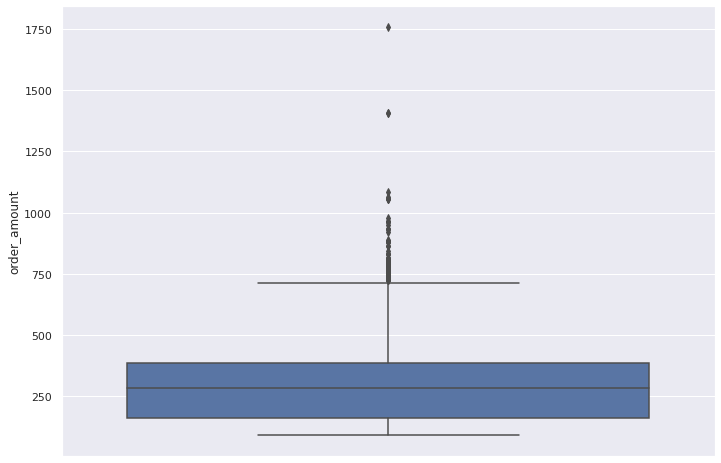

In [ ]:
order_amount_outliers2 = sns.boxplot(y="order_amount", data=df_no_outliers)

### Analysis of dataframe with outliers removed
- The boxplot of the dataframe with rows removed if the shop_ID = 78 and total_items = 2000 makes much more sense than original df 
- The AOV with this new dataframe with outliers removed is 302.58CAD, which makes much more sense for the price point of most sneakers than the original 3145.13CAD number

### What else might we want to measure? 
- We may also want to know what the average price is for sneakers between the 100 unique shops 
- This will give us a good indication of what the sellers believe is the market for sneakers 
- To calculate this, we will need to look at the average of price of sneakers for each shop 
- We can also compare this with the average price per piece value for the entire dataset (removing shop_id = 78, as this is an outlier with price > 25000CAD)
  - comparing these 2 values may help inform us of customer spending behaviours (do they prefer sneakers below or above the average price?)

In [ ]:
#determine the average price of sneakers across the 100 unique shops
#get df with unique shop_id and price_per_piece
df_avgprice = df.drop(columns=['order_id', 'user_id', 'order_amount', 'total_items', 'payment_method', 'created_at'], axis=1)

In [ ]:
df_avgprice.head()

,shop_id,price_per_piece
0,53,112.0
1,92,90.0
2,44,144.0
3,18,156.0
4,18,156.0


In [ ]:
# the mean price of sneakers across all 100 shops is 387CAD
df_avgprice = df_avgprice.drop_duplicates()
df_avgprice.mean()

shop_id             50.50
price_per_piece    407.99
dtype: float64

In [ ]:
df_avgprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 561
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   shop_id          100 non-null    int64  
 1   price_per_piece  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [ ]:
# the mean of the price of sneakers across all shops except shop_id = 78 (price is >25000CAD) is 152.26CAD
df_avgprice = df_avgprice.loc[df_avgprice['shop_id'] != 78]
df_avgprice.mean()

shop_id             50.222222
price_per_piece    152.262626
dtype: float64

In [ ]:
df_no_outliers78 = df.loc[(df['shop_id'] != 78)]
df_no_outliers78.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_piece
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [ ]:
# calculate mean price per piece of entire dataset
df_no_outliers78.mean()

order_id           2498.990916
shop_id              49.819540
user_id             848.919257
order_amount       2717.367784
total_items           8.851029
price_per_piece     152.475575
dtype: float64

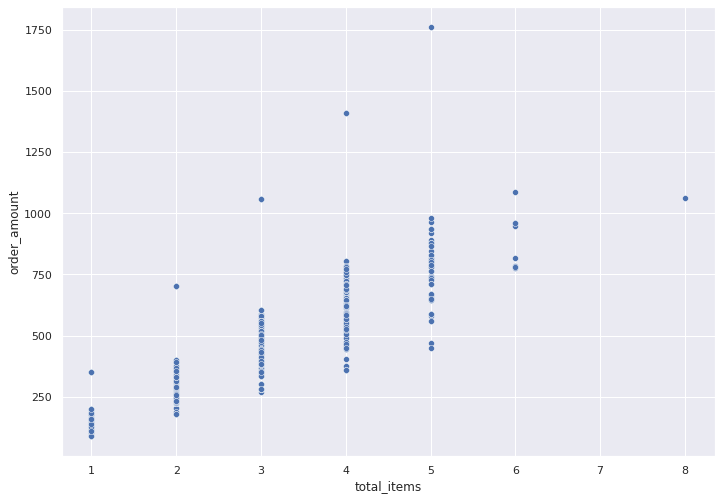

In [ ]:
sns.scatterplot(data=df_no_outliers, x='total_items', y='order_amount')

### Conclusion
- AOV is ~300CAD
- ASP (average selling price) across 100 store is ~400CAD
- ASP excluding shop_id = 78 (outlier) is ~150CAD

